In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif

In [4]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [5]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, plot_roc_curve

In [6]:
# load data file
data = pd.read_csv('data_processed.csv')
data

,PATH_N_STAGE,M_CTNNAL1,M_C16ORF91,M_PRSS27,M_HIST1H3J,M_OAS1,M_CKS1B,M_MAP6D1,M_LOC100129935,M_GABPB2,...,M_HLA-DPB1,M_HPDL,M_ZC3H11A,M_TESPA1,M_RAB39A,M_ATG16L1,M_RNF135,M_CAPN14,M_RABL2A,M_ASB13
0,2.0,-0.7253,-0.0768,-0.0967,-0.6287,-0.1719,-0.5324,-0.0323,-0.0489,-0.5993,...,-0.7532,4.1173,0.3612,-0.7000,-0.4913,-0.0141,-0.1810,-0.3636,0.0976,-1.3205
1,2.0,0.3567,-0.7217,-0.2737,0.0056,-0.6596,-0.7607,-0.7301,-0.0489,-0.7948,...,-0.8281,0.2793,0.1532,-0.5564,-0.2891,-0.4861,-0.0159,0.8203,0.4123,0.3274
2,2.0,-1.6328,-1.2149,-0.6054,0.3899,-0.1846,-0.8369,-0.5067,-0.0489,-2.0156,...,-1.1604,0.8328,-1.1808,-0.6206,0.0872,0.1618,1.3626,-0.1659,0.8552,0.2087
3,2.0,0.5051,0.2343,-0.5626,0.9624,-0.5755,-0.2063,0.7426,-0.0489,0.8774,...,-0.6370,-0.4139,0.7234,-0.6513,-0.1241,0.8600,-0.1750,-0.6490,-1.0373,0.2868
4,2.0,1.6196,0.3325,-0.4805,-0.6287,-0.5363,0.0658,-0.6350,-0.0489,0.4251,...,-0.5394,-0.2538,0.5924,-0.4398,-0.4335,-1.9213,-0.3402,-0.7131,-0.6063,0.4258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1.0,-0.0506,-0.2335,0.3169,-0.0826,-0.2698,0.8429,0.2255,-0.0489,3.2326,...,2.2672,0.3750,-0.5360,3.5292,-0.2015,-0.6994,0.9662,-0.0530,0.1612,-1.1149
413,1.0,0.5306,0.0369,-0.5095,0.5126,-0.4321,0.0187,0.6411,-0.0489,1.1949,...,0.6081,-0.0431,0.2345,0.9109,0.0642,0.7365,0.3810,-0.3108,1.0893,0.5753
414,1.0,3.3271,1.7487,-0.3745,0.5228,-0.1579,1.6761,4.1996,-0.0489,4.4300,...,1.0021,-0.3415,1.4632,1.1339,0.3670,-0.3613,-0.6580,0.6786,1.1767,-0.6225
415,1.0,-1.1593,0.1446,4.7902,0.0459,1.8775,0.7112,-0.4126,-0.0489,0.9277,...,3.6217,-0.4544,1.8294,4.3256,0.0244,-0.2576,1.2125,0.5778,1.2353,-0.6806


In [7]:
# Split the data into 80%/20%
data_train, data_test = train_test_split(data, test_size = 0.2, random_state=42)
data_train = data_train.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)

In [8]:
X = data_train.iloc[:,1:]
y = data_train['PATH_N_STAGE']

### Run ANOVA F value again

This move recalculate ANOVA F-value for all features so that the order of the features to include in the model best reflect difference between groups instead of within group.

In [9]:
f_values, p_values = f_classif(X.iloc[:,1:],y)
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [10]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': X.iloc[:,1:].columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = X[columns]
X = selected
X

,M_C16ORF91,M_MAP6D1,M_HIST1H2AK,M_ASH1L-AS1,M_HIST1H3J,M_SPATA46,M_GOLGA1,M_PRSS27,M_HIST1H2BN,M_C9ORF163,...,M_RAD9A,M_RPA4,M_BBC3,M_HOTAIR,M_DUX4L6,M_KISS1R,M_KCNJ9,M_PIGL,M_LOC100129935,M_OR10G9
0,0.8792,-0.3510,-0.3868,0.0693,-0.2442,-0.6439,0.8551,0.1356,1.2886,2.5268,...,0.4958,-0.2268,-0.2790,-0.1641,5.0093,-0.1309,3.4446,0.3162,-0.0489,-0.0504
1,1.1363,-0.2738,-0.1765,0.3303,0.3021,0.2213,0.1103,-0.0034,-0.7416,0.0767,...,-0.4151,-0.1522,1.4193,2.6129,-0.1881,-0.2389,1.4233,-0.0742,-0.0489,-0.0504
2,-0.7364,-1.1468,-0.1550,0.1437,-0.6287,-0.6439,-0.7200,-0.2643,-0.3989,-0.4706,...,-0.2748,-0.1527,0.1968,-0.3996,-0.1881,-0.1954,-0.7553,-0.1914,-0.0489,-0.0504
3,-0.9999,-0.4907,-0.2636,-0.2875,-0.6287,3.5319,0.7420,0.0393,-1.5120,-0.5096,...,-0.3144,-0.5817,-0.6945,0.3986,-0.1881,-0.2389,0.7469,0.5225,-0.0489,-0.0504
4,2.6742,-0.6972,-0.7952,-0.2508,-0.6287,-0.6439,-0.4717,-0.6117,-0.6322,0.2822,...,0.9930,0.0924,-0.6307,1.0482,-0.1881,-0.1363,-0.1854,-0.6224,-0.0489,-0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,-0.8179,-0.3634,-0.8512,-0.0060,0.5137,0.3913,-0.5895,-0.2057,-0.7074,...,-0.7982,-0.2943,-0.5631,-0.4145,-0.1881,-0.2098,-0.1075,-0.6982,-0.0489,-0.0504
329,-0.6168,0.1017,-0.1894,0.1920,-0.6287,0.3637,0.0425,0.3491,-0.9687,-0.3151,...,0.1278,-0.4566,-0.7463,0.1092,-0.1881,-0.2008,-0.3324,0.3953,-0.0489,-0.0504
330,0.8713,0.9111,1.4000,1.0178,-0.1033,-0.6439,3.4720,0.5115,0.9060,3.5975,...,1.6843,0.0245,-0.1362,-0.3681,3.3634,-0.0913,-0.7553,1.8720,-0.0489,-0.0504
331,-1.1250,-0.6607,-0.1890,-0.9390,0.5643,1.0194,-0.5864,-0.4240,-0.0317,-0.7976,...,-1.1615,-0.4441,-0.6757,-0.4448,-0.1881,-0.2389,-0.7553,-0.8009,-0.0489,-0.0504


Examine how many of the 21 features from the paper were included in our selected features

In [10]:
tfeatures = ['M_SPAG1', 'M_PLEKHF2','M_RALGPS1','M_OMP', 'M_CTNNAL1','M_ZBTB34','M_ODF2','M_FKBP15','M_GOLGA1','M_CHAF1B',
                'M_ORAOV1','M_ZNF174','M_C20ORF204','M_ZNF263','M_HIST1H2BI','M_NUP85','M_KIF18A','M_ARPC5L',
             'M_ANKRD13D','M_ZBTB43','M_ABCA17P']
include = []
for feature in tfeatures:
    if feature in X:
        include.append(feature)
X[include]

,M_SPAG1,M_PLEKHF2,M_RALGPS1,M_OMP,M_ZBTB34,M_ODF2,M_FKBP15,M_GOLGA1,M_CHAF1B,M_ORAOV1,M_ZNF174,M_C20ORF204,M_ZNF263,M_HIST1H2BI,M_NUP85,M_KIF18A,M_ARPC5L,M_ANKRD13D,M_ZBTB43,M_ABCA17P
0,1.2466,-1.3109,-1.6323,-0.3970,-1.2760,-0.5172,-0.6873,0.8551,-0.3831,1.1401,2.0563,0.7959,-0.2567,-0.3089,0.9882,-0.1473,1.8968,1.1955,-0.9975,-0.0015
1,0.0325,1.3072,0.6812,0.0295,1.0012,-0.3546,0.3899,0.1103,-0.3568,0.6049,2.2878,3.9052,1.6904,-0.3089,-0.3018,-0.6633,-1.1620,0.1585,0.6903,1.7900
2,-1.3567,-1.5858,-1.0391,-0.4553,-0.6616,-0.7833,-0.0731,-0.7200,1.2592,0.0169,0.1613,-0.6737,-1.2191,-0.3089,0.7295,0.2227,-0.4549,-0.7404,-0.6183,0.2363
3,1.0180,1.5850,1.7877,-0.1961,-0.3372,-0.7555,1.0965,0.7420,-0.8093,0.2206,-1.9870,0.0648,-0.6131,-0.3089,0.5612,-0.6746,-1.0250,0.5796,1.5411,-0.3089
4,-0.2136,-0.9620,0.1826,-0.6972,-0.1118,1.5194,0.6417,-0.4717,-0.9700,0.1513,1.6097,-0.4133,0.6547,-0.3089,0.3428,-0.9576,1.1385,0.2831,0.0122,1.7001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.7998,-0.2829,-0.0370,-0.5351,0.0569,-0.8809,0.7174,0.3913,-0.9337,-1.4429,-0.3305,-0.8512,-1.0630,-0.3089,-1.3027,-0.3197,-0.9688,-1.2187,0.0177,-0.9104
329,1.6271,-0.5844,0.1919,0.5723,-0.4730,-0.1924,0.7476,0.0425,-0.4777,0.0500,-0.6722,0.5768,-0.1433,-0.3089,0.2905,-0.4896,-0.1129,0.7321,-0.2081,-0.3379
330,0.2801,1.0749,2.3825,2.7900,0.5852,3.3981,2.2541,3.4720,3.2961,1.2223,1.5925,0.6670,1.5216,-0.3089,1.7664,2.2471,1.2212,1.4231,0.9816,-0.0704
331,0.5409,-0.3872,-0.8135,-0.4643,-0.3232,-0.4118,-0.0823,-0.5864,-1.2450,-1.6018,-1.1689,-0.7668,-0.7582,-0.3089,-0.9527,0.3525,-0.8783,-1.2498,-0.4674,-0.6991


There were 20 features included in our table. This is within our expectation according to Figure S4.

### K mean clustering and hierarchical clustering 

K-means clustering discriminates the samples based on the given number of clusters (here, n = 2) in a way that data points of each cluster were placed near to their centroid. 

To find the best set of variables to drive a decent machine learning model, the paper used K-means clustering.

As it is shown in Fig. S1 from the paper. **The best results for K-means clustering were obtained with 30-variables set.**

1. Kmean clustering for all features

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred_pd = pd.DataFrame(y_pred)
centroids = kmeans.cluster_centers_

In [13]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [14]:
# For case 1: 0 means 1.0 (N1) and 1 means 2.0 (N0), we only need to add 1 to every label
case1 = y_pred+1.0
# For case 2: 0 means 2.0 (N0) and 1 means 1.0 (N1), we can replace every 0 to 2 and keep 1 as 1.
y_pred[y_pred == 0] = 2.0
case2 = pd.DataFrame(y_pred)+0.0
accuracy1 = metrics.accuracy_score(y, case1)
accuracy2 = metrics.accuracy_score(y, case2)
accur = max(accuracy1, accuracy2)
accur

0.8378378378378378

Here, we can tell that although y_pred seems to make a horrible prediction. The accuracy rate doesn't reflect such relionship. We need to use MCC as a better measurement.

In [15]:
MCC1 = matthews_corrcoef(y, case1)
MCC2 = matthews_corrcoef(y, case2)
MCCmax = max(MCC1,MCC2)
MCCmax

0.12338774048357858

A MCC close to 0 indicates that the prediction is close to random guessing.

2. Visualize the clustering based on 2 features

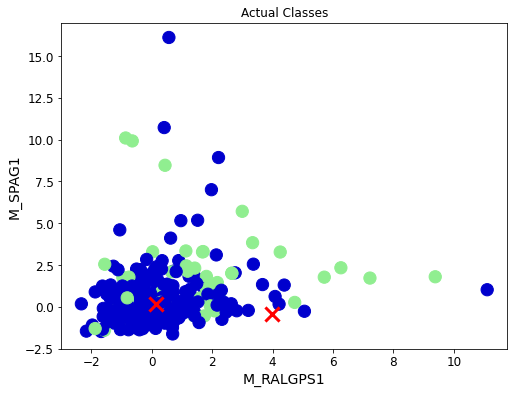

In [16]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_RALGPS1'], y=X['M_SPAG1'], s=150,
            c=y.astype('category'), 
            cmap = customcmap)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_RALGPS1', fontsize=14)
ax.set_ylabel(r'M_SPAG1', fontsize=14)
plt.title('Actual Classes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
X

,M_C16ORF91,M_MAP6D1,M_HIST1H2AK,M_ASH1L-AS1,M_HIST1H3J,M_SPATA46,M_GOLGA1,M_PRSS27,M_HIST1H2BN,M_C9ORF163,...,M_RAD9A,M_RPA4,M_BBC3,M_HOTAIR,M_DUX4L6,M_KISS1R,M_KCNJ9,M_PIGL,M_LOC100129935,M_OR10G9
0,0.8792,-0.3510,-0.3868,0.0693,-0.2442,-0.6439,0.8551,0.1356,1.2886,2.5268,...,0.4958,-0.2268,-0.2790,-0.1641,5.0093,-0.1309,3.4446,0.3162,-0.0489,-0.0504
1,1.1363,-0.2738,-0.1765,0.3303,0.3021,0.2213,0.1103,-0.0034,-0.7416,0.0767,...,-0.4151,-0.1522,1.4193,2.6129,-0.1881,-0.2389,1.4233,-0.0742,-0.0489,-0.0504
2,-0.7364,-1.1468,-0.1550,0.1437,-0.6287,-0.6439,-0.7200,-0.2643,-0.3989,-0.4706,...,-0.2748,-0.1527,0.1968,-0.3996,-0.1881,-0.1954,-0.7553,-0.1914,-0.0489,-0.0504
3,-0.9999,-0.4907,-0.2636,-0.2875,-0.6287,3.5319,0.7420,0.0393,-1.5120,-0.5096,...,-0.3144,-0.5817,-0.6945,0.3986,-0.1881,-0.2389,0.7469,0.5225,-0.0489,-0.0504
4,2.6742,-0.6972,-0.7952,-0.2508,-0.6287,-0.6439,-0.4717,-0.6117,-0.6322,0.2822,...,0.9930,0.0924,-0.6307,1.0482,-0.1881,-0.1363,-0.1854,-0.6224,-0.0489,-0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,-0.8179,-0.3634,-0.8512,-0.0060,0.5137,0.3913,-0.5895,-0.2057,-0.7074,...,-0.7982,-0.2943,-0.5631,-0.4145,-0.1881,-0.2098,-0.1075,-0.6982,-0.0489,-0.0504
329,-0.6168,0.1017,-0.1894,0.1920,-0.6287,0.3637,0.0425,0.3491,-0.9687,-0.3151,...,0.1278,-0.4566,-0.7463,0.1092,-0.1881,-0.2008,-0.3324,0.3953,-0.0489,-0.0504
330,0.8713,0.9111,1.4000,1.0178,-0.1033,-0.6439,3.4720,0.5115,0.9060,3.5975,...,1.6843,0.0245,-0.1362,-0.3681,3.3634,-0.0913,-0.7553,1.8720,-0.0489,-0.0504
331,-1.1250,-0.6607,-0.1890,-0.9390,0.5643,1.0194,-0.5864,-0.4240,-0.0317,-0.7976,...,-1.1615,-0.4441,-0.6757,-0.4448,-0.1881,-0.2389,-0.7553,-0.8009,-0.0489,-0.0504


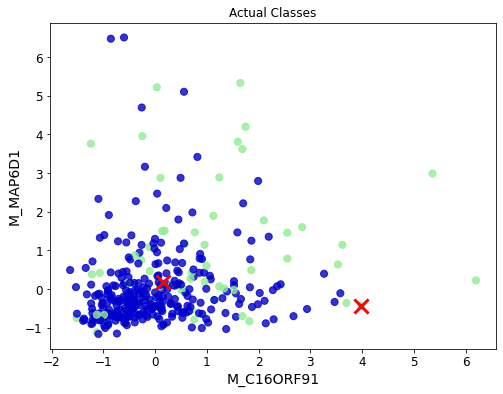

In [18]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_C16ORF91'], y=X['M_MAP6D1'], s=50,
            c=y.astype('category'), 
            cmap = customcmap, alpha = 0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_C16ORF91', fontsize=14)
ax.set_ylabel(r'M_MAP6D1', fontsize=14)
plt.title('Actual Classes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

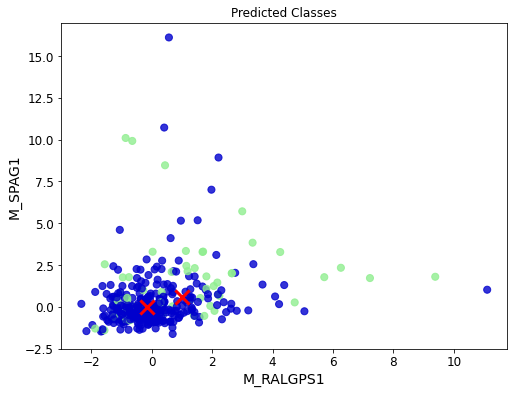

In [15]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_RALGPS1'], y=X['M_SPAG1'], s=50,
            c=y.astype('category'), 
            cmap = customcmap, alpha = 0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_RALGPS1', fontsize=14)
ax.set_ylabel(r'M_SPAG1', fontsize=14)
plt.title('Predicted Classes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As shown by the graph, the prediction now is horrible.

Calcualte MCC and accuracy

In [20]:
# This is a function that takes in the X,y,and total number of features to consider 
# and returns the MCC value using given amount of variables
def MCC_func(X_train,y_true,index):
    data_kmeans = model.fit(X_train.iloc[:,0:index+1])
    #print(X_train.iloc[:,0:2])
    y_pred = data_kmeans.predict(X_train.iloc[:,0:index+1])
    case1 = y_pred+1.0
    y_pred[y_pred == 0] = 2.0
    case2 = pd.DataFrame(y_pred)+0.0
    MCC1 = matthews_corrcoef(y_true, case1)
    MCC2 = matthews_corrcoef(y_true, case2)
    #MCC2 = 1 - MCC1
    #print(y_pred)
    #print(case1)
    return max(MCC1,MCC2)

In [21]:
def accuracy_func (X_train,y_ture,index):
    data_kmeans = model.fit(X_train.iloc[:,0:index+10])
    y_pred = data_kmeans.predict(X_train.iloc[:,0:index+10])
    case1 = y_pred+1.0
    y_pred[y_pred == 0] = 2.0
    case2 = pd.DataFrame(y_pred)+0.0
    accuracy1 = metrics.accuracy_score(y_ture, case1)
    accuracy2 = metrics.accuracy_score(y_ture, case2)
    return max(accuracy1, accuracy2)

The following code may take a long time to run. Try 20 for trials.

In [24]:
model = KMeans(n_clusters=2) 
MCC = []
i = 0
while i<= 1000:
    score = MCC_func(X,y,i)
    MCC.append(score)
    i += 1

In [20]:
model = KMeans(n_clusters=2) 
MCC2 = []
i = 0
while i<= 20:
    score = MCC_func(X,y,i)
    MCC2.append(score)
    i += 10

In [65]:
max_y = max(MCC)
print(max_y)
max_x = MCC.index(max_y)
print(max_x)

0.5250676002030691
58


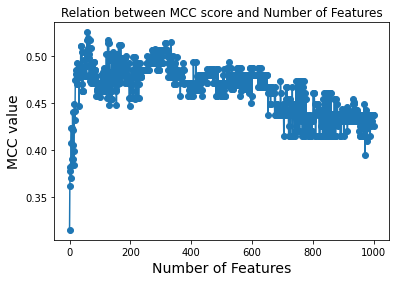

In [62]:
index = list(range(0,1001))
#max_y = max(MCC)
#max_x = MCC.index(max_y)
plt.plot(index, MCC, '-o')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('MCC value', fontsize=14)
plt.title('Relation between MCC score and Number of Features')
plt.show()

The result indicated that as features increase by 1, MCC value increased steadily from 0 to around 60, and then remained steady till 500.

In [22]:
#index = list(range(0,21,10))
#plt.plot(index, MCC2, '-o')
#ax.set_xlabel('Number of variables', fontsize=14)
#ax.set_ylabel('MCC value', fontsize=14)
#plt.title('increment by 10')
#plt.show()

The increment by 10 graph showed that the MCC peaked around 30-50 and decreased steadily to 200 afterwards. Therefore, our current trend matched the result shown in the paper. Next, we wish to find the optimal number of variables.

In [26]:
MCC_pd = pd.DataFrame(MCC, columns = ['MCC'])
MCC_pd.sort_values(by = ['MCC'], ascending=[False]).iloc[:10,:]

,MCC
58,0.525068
62,0.519015
66,0.516523
125,0.516523
57,0.516523
334,0.514406
312,0.513551
316,0.513551
126,0.513087
128,0.513087


After taken 1000 features into account, we found that 58 features would be the optimal number in attaining the best K mean clustering

For the top 10 highest MCC score, 30 features are not a good number.

In [27]:
#MCC_pd2 = pd.DataFrame(MCC2, columns = ['MCC'])
#MCC_pd2.sort_values(by = ['MCC'], ascending=[False]).iloc[:10,:]

Therefore, we conluded that the optimal MCC occurs with 58 features.

In [81]:
model = KMeans(n_clusters=2) 
accuracy = []
i = 0
while i<= 500:
    score = accuracy_func(X,y,i)
    accuracy.append(score)
    i += 1

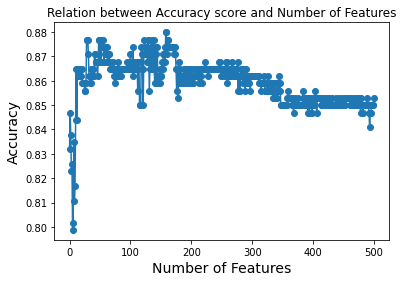

In [82]:
index = list(range(0,501))
plt.plot(index, accuracy, '-o')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Relation between Accuracy score and Number of Features')
plt.show()

If we plot the accuracy graph. The trand matched what we found about the MCC score.

In [83]:
accu_pd = pd.DataFrame(accuracy, columns = ['accuracy'])
accu_pd.sort_values(by = ['accuracy'], ascending=[False]).iloc[:10,:]

,accuracy
159,0.879880
158,0.879880
49,0.876877
136,0.876877
29,0.876877
162,0.876877
161,0.876877
30,0.876877
123,0.876877
138,0.876877


Interestingly, the accuracy is the highest when 30 varibales were included.

In [35]:
tryit = X.iloc[:,:30]

In [36]:
tfeatures = ['M_SPAG1', 'M_PLEKHF2','M_RALGPS1','M_OMP', 'M_CTNNAL1','M_ZBTB34','M_ODF2','M_FKBP15','M_GOLGA1','M_CHAF1B',
                'M_ORAOV1','M_ZNF174','M_C20ORF204','M_ZNF263','M_HIST1H2BI','M_NUP85','M_KIF18A','M_ARPC5L',
             'M_ANKRD13D','M_ZBTB43','M_ABCA17P']
ins = []
for feature in tfeatures:
    if feature in tryit:
      ins.append(tryit[feature])
ins = pd.DataFrame(ins).transpose()
ins

,M_SPAG1,M_ODF2,M_FKBP15,M_GOLGA1,M_HIST1H2BI
0,1.2466,-0.5172,-0.6873,0.8551,-0.3089
1,0.0325,-0.3546,0.3899,0.1103,-0.3089
2,-1.3567,-0.7833,-0.0731,-0.7200,-0.3089
3,1.0180,-0.7555,1.0965,0.7420,-0.3089
4,-0.2136,1.5194,0.6417,-0.4717,-0.3089
...,...,...,...,...,...
328,0.7998,-0.8809,0.7174,0.3913,-0.3089
329,1.6271,-0.1924,0.7476,0.0425,-0.3089
330,0.2801,3.3981,2.2541,3.4720,-0.3089
331,0.5409,-0.4118,-0.0823,-0.5864,-0.3089


However, within the top 58 features, only 8 of the 20 features selected by the paper appeared. Within the top 30 features, only 5 of the 20 features selected by the paper appeared.

In [38]:
paper = X[include]
model = KMeans(n_clusters=2) 
data_kmeans = model.fit(paper)
y_pred = data_kmeans.predict(paper)
case1 = y_pred+1.0
y_pred[y_pred == 0] = 2.0
case2 = pd.DataFrame(y_pred)+0.0
MCC1 = matthews_corrcoef(y, case1)
MCC2 = matthews_corrcoef(y, case2)
print(max(MCC1,MCC2))

0.12338774048357858


Moreover, even if we used the 20 featues from the paper to run Kmean clustering, the MCC value is close to random. This indicated that either our fitting model is problematic, or our calculation of MCC is wrong, or there are another list of 30 genes selected by the paper that I missed.

Finally, to visualize Kmean clustering on a 2D map, we chose gene RALGPS1 and SPAG1 like the paper. 

In [18]:
model = KMeans(n_clusters=2) 
BestModel = model.fit(X.iloc[:,0:58])
y_pred_best = BestModel.predict(X.iloc[:,0:58])
y_pred_pd = pd.DataFrame(y_pred_best)
centroids = BestModel.cluster_centers_

In [16]:
def label_ypred(y_true, y_predict):
    case1 = y_predict+1.0
    y_predict[y_predict == 0] = 2.0
    case2 = pd.DataFrame(y_predict)+0.0
    MCC1 = matthews_corrcoef(y_true, case1)
    MCC2 = matthews_corrcoef(y_true, case2)
    if (max(MCC1,MCC2) == MCC1):
        y_pred = case1
    else:
        y_pred = case2
    return y_pred

In [25]:
y_pred_labeled = label_ypred(y, y_pred_best)

In [26]:
X # Use this table to find the 2 best features

,M_C16ORF91,M_MAP6D1,M_HIST1H2AK,M_ASH1L-AS1,M_HIST1H3J,M_SPATA46,M_GOLGA1,M_PRSS27,M_HIST1H2BN,M_C9ORF163,...,M_RAD9A,M_RPA4,M_BBC3,M_HOTAIR,M_DUX4L6,M_KISS1R,M_KCNJ9,M_PIGL,M_LOC100129935,M_OR10G9
0,0.8792,-0.3510,-0.3868,0.0693,-0.2442,-0.6439,0.8551,0.1356,1.2886,2.5268,...,0.4958,-0.2268,-0.2790,-0.1641,5.0093,-0.1309,3.4446,0.3162,-0.0489,-0.0504
1,1.1363,-0.2738,-0.1765,0.3303,0.3021,0.2213,0.1103,-0.0034,-0.7416,0.0767,...,-0.4151,-0.1522,1.4193,2.6129,-0.1881,-0.2389,1.4233,-0.0742,-0.0489,-0.0504
2,-0.7364,-1.1468,-0.1550,0.1437,-0.6287,-0.6439,-0.7200,-0.2643,-0.3989,-0.4706,...,-0.2748,-0.1527,0.1968,-0.3996,-0.1881,-0.1954,-0.7553,-0.1914,-0.0489,-0.0504
3,-0.9999,-0.4907,-0.2636,-0.2875,-0.6287,3.5319,0.7420,0.0393,-1.5120,-0.5096,...,-0.3144,-0.5817,-0.6945,0.3986,-0.1881,-0.2389,0.7469,0.5225,-0.0489,-0.0504
4,2.6742,-0.6972,-0.7952,-0.2508,-0.6287,-0.6439,-0.4717,-0.6117,-0.6322,0.2822,...,0.9930,0.0924,-0.6307,1.0482,-0.1881,-0.1363,-0.1854,-0.6224,-0.0489,-0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,-0.8179,-0.3634,-0.8512,-0.0060,0.5137,0.3913,-0.5895,-0.2057,-0.7074,...,-0.7982,-0.2943,-0.5631,-0.4145,-0.1881,-0.2098,-0.1075,-0.6982,-0.0489,-0.0504
329,-0.6168,0.1017,-0.1894,0.1920,-0.6287,0.3637,0.0425,0.3491,-0.9687,-0.3151,...,0.1278,-0.4566,-0.7463,0.1092,-0.1881,-0.2008,-0.3324,0.3953,-0.0489,-0.0504
330,0.8713,0.9111,1.4000,1.0178,-0.1033,-0.6439,3.4720,0.5115,0.9060,3.5975,...,1.6843,0.0245,-0.1362,-0.3681,3.3634,-0.0913,-0.7553,1.8720,-0.0489,-0.0504
331,-1.1250,-0.6607,-0.1890,-0.9390,0.5643,1.0194,-0.5864,-0.4240,-0.0317,-0.7976,...,-1.1615,-0.4441,-0.6757,-0.4448,-0.1881,-0.2389,-0.7553,-0.8009,-0.0489,-0.0504


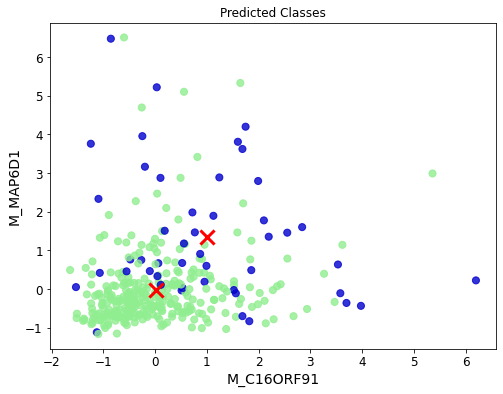

In [27]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_C16ORF91'], y=X['M_MAP6D1'], s=50,
            c=y_pred_pd.astype('category'), 
            cmap = customcmap, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_C16ORF91', fontsize=14)
ax.set_ylabel(r'M_MAP6D1', fontsize=14)
plt.title('Predicted Classes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

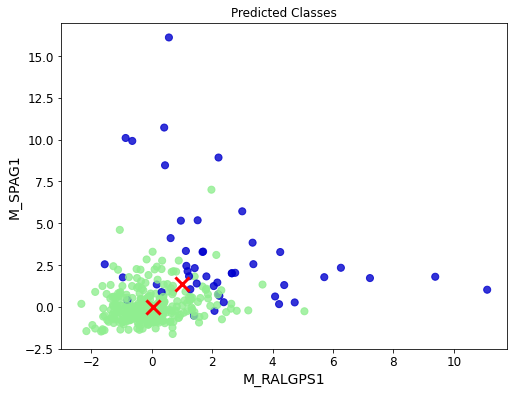

In [28]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_RALGPS1'], y=X['M_SPAG1'], s=50,
            c=y_pred_pd.astype('category'), 
            cmap = customcmap, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_RALGPS1', fontsize=14)
ax.set_ylabel(r'M_SPAG1', fontsize=14)
plt.title('Predicted Classes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

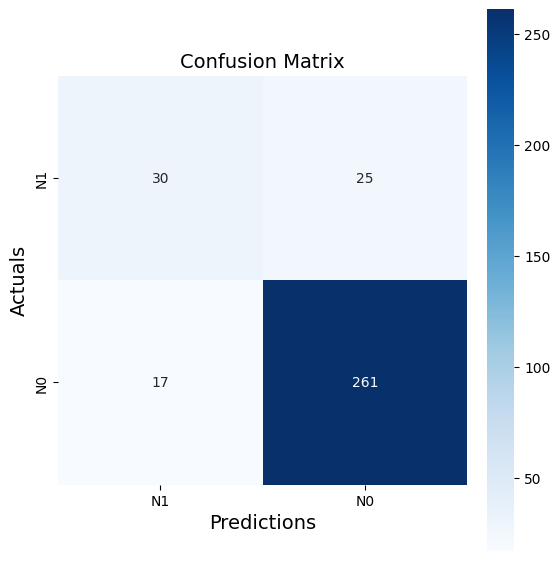

In [29]:
conf_matrix = confusion_matrix(y, y_pred_labeled, labels=[1.0, 2.0]) 
fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k', constrained_layout=True, subplot_kw=dict(aspect='equal'))
class_names = ['N1','N0']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Actuals', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=14)
plt.show()

**According to the paper, SPAG1 and RALGPS1 had the most significant changes in expression values. How do they know this?**

3. Hierarchical clustering separates the samples according to their distance to each other. It could provide a hierarchy to determine the distance between different clusters.

In an attempt to mimic the graph from the paper, both y-axis and x-axis used single linkage, which is also known as the nearest-neighbor method or the minimum method. 

In [30]:
# Compute the mean and standard deviation of each row
mean = np.mean(X, axis=1)
std_dev = np.std(X, axis=1)

# Normalize the data by subtracting the mean and dividing by the standard deviation
X_normalized = (X - mean[:, np.newaxis]) / std_dev[:, np.newaxis]
scaled_pd = pd.DataFrame(X_normalized)

# Verify that the normalized row has standard deviation of 1
std_dev_normalized = np.std(X_normalized,axis = 1)
print(std_dev_normalized)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
328    1.0
329    1.0
330    1.0
331    1.0
332    1.0
Length: 333, dtype: float64


/tmp/ipykernel_3795952/1484764585.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_normalized = (X - mean[:, np.newaxis]) / std_dev[:, np.newaxis]


In [31]:
y_pred_labeled

array([2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
       2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

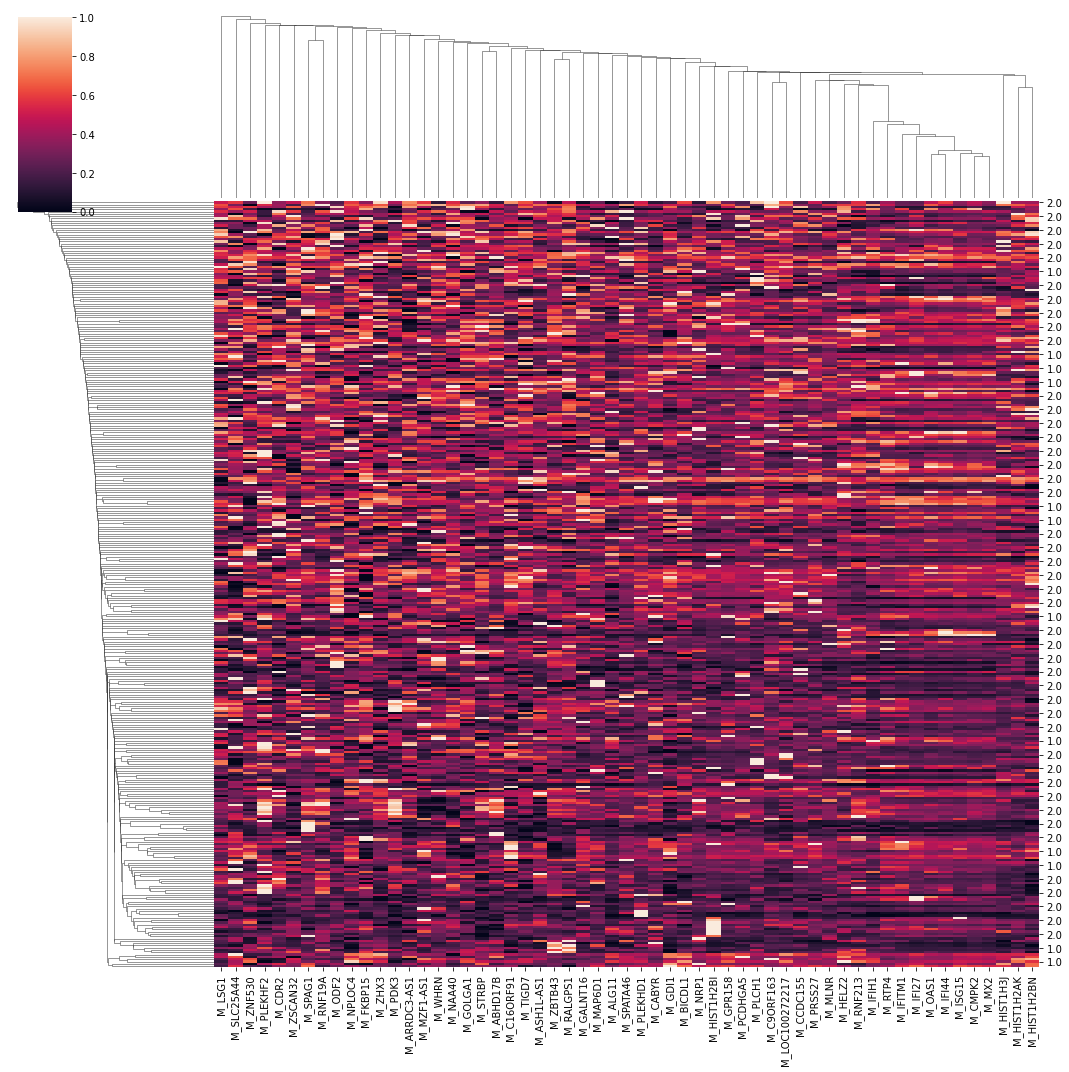

In [64]:
# Define a function to subtract constant from euclidean distance
def custom_euclidean(u, v):
    return euclidean(u, v) - 0.7

# Apply the custom function to the distance metric in clustermap
clustergrid = sns.clustermap(X.iloc[:,:57], method='single', metric=custom_euclidean, standard_scale=0, figsize=(15,15))

# Set ytick labels with larger font size
clustergrid.ax_heatmap.set_yticklabels(y_pred_labeled[:56], fontsize=10)
#I don't know how to reduce the distance of the branch properly

clustergrid.savefig("clustermap.png")

4. PCA with 70-genes set to find the most important genes

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.iloc[:,:58])

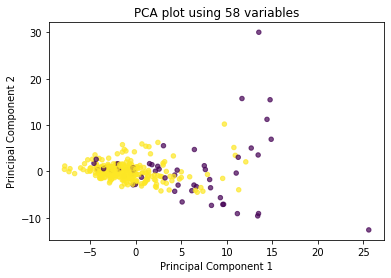

In [14]:
plt.scatter(principal_components[:,0], principal_components[:,1], c= y, s = 20, alpha = 0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot using 58 variables')
plt.show()

In [19]:
y_pred_labeled = label_ypred(y, y_pred_best)
y_pred_labeled

array([2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
       2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [20]:
y

0      2.0
1      1.0
2      2.0
3      2.0
4      2.0
      ... 
328    2.0
329    2.0
330    2.0
331    1.0
332    2.0
Name: PATH_N_STAGE, Length: 333, dtype: float64

In [21]:
fpr

NameError: name 'fpr' is not defined

[3. 2. 1.]
[0.         0.45454545 1.        ]


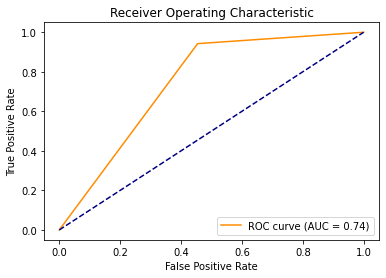

In [23]:
fpr, tpr, thresholds = roc_curve(np.array(y), y_pred_labeled, pos_label=2.0, drop_intermediate = False)
print(thresholds)
roc_auc = auc(fpr, tpr)
print(fpr)
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [43]:
plot_roc_curve(pca,X.iloc[:,:70], y)

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: Expected 'estimator' to be a binary classifier, but got PCA

In [ ]:
y_pred_labeled

In [ ]:
y